### Data Preprocessing

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


## Handling Missing Data

In [4]:
missing_data = data.isnull().sum()
print(missing_data)

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


## Encoding categorical data 

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['sales_channel_encoded'] = label_encoder.fit_transform(data['sales_channel'])
data['trip_type_encoded'] = label_encoder.fit_transform(data['trip_type'])
data['flight_day_encoded'] = label_encoder.fit_transform(data['flight_day'])
data['route_encoded'] = label_encoder.fit_transform(data['route'])
data['booking_origin_encoded'] = label_encoder.fit_transform(data['booking_origin'])

data.drop(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], axis=1, inplace=True)

## Features correlation heat Map

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


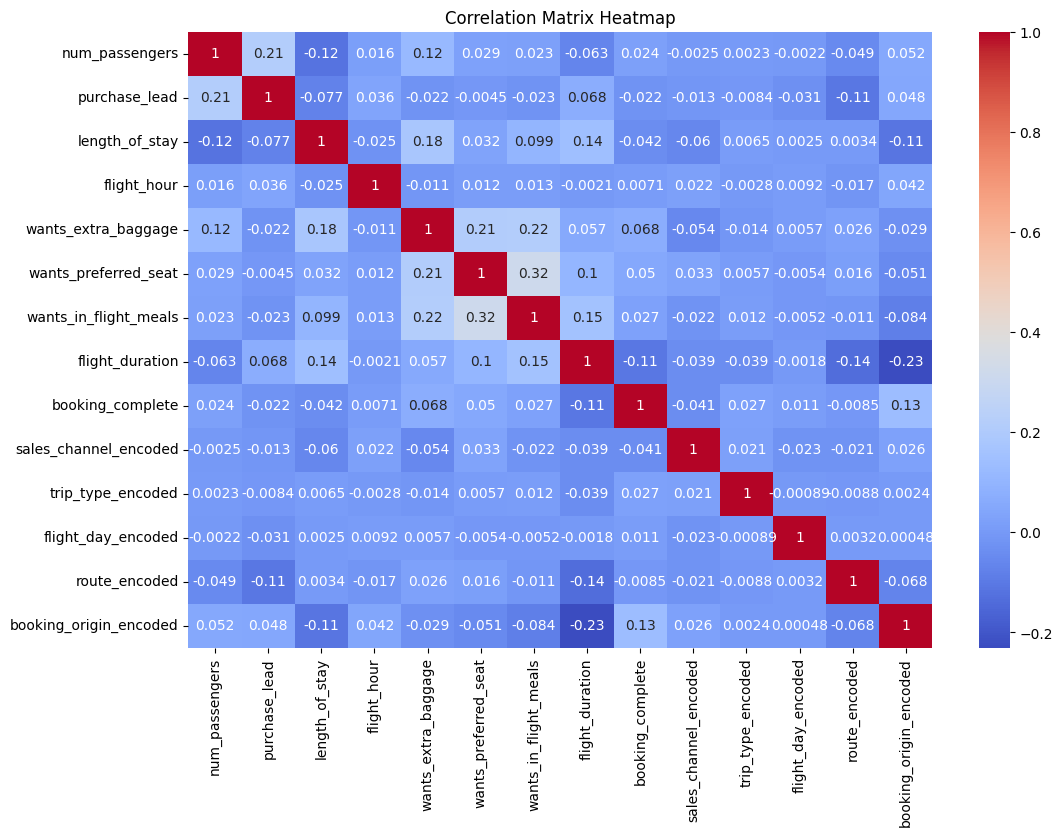

In [6]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
import csv
import numpy as np
import pandas as pd
%pip install keras
%pip install tensorflow
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
from numpy.random import seed
import tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Implementing the random forest classifier model

In [ ]:
features = data.drop("booking_complete", axis=1)
split = 3
trees = 15
predict = data['booking_complete']
rf = RandomForestClassifier(random_state=0, min_samples_split=split, n_estimators=trees)
rf.fit(features, predict)
predictions = rf.predict(features)
# Calculate accuracy
actuals = list(predict)
correct = 0
for i in range(len(actuals)):
# print('Predicted:', predictions[i], ' Actual:', actuals[i])
  if predictions[i] == actuals[i]: correct +=1
print('Accuracy:', round(correct/len(actuals),5))
# Try different values for split and trees, different features

In [ ]:

# Calculate other metrics
confusion = confusion_matrix(predict_test, predictions)
print('Confusion Matrix:')
print(confusion)

print('Classification Report:')
print(classification_report(predict_test, predictions))

# Plot ROC curve if needed
fpr, tpr, _ = roc_curve(predict_test, probabilities)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Feature Importance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Get feature importances from the model
feature_importance = rf.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # X_train should be your training data

# Create a DataFrame to organize the features and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 important features
top_n = 10  
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Feature Importance')
plt.title('Top Feature Importance Scores')
plt.gca().invert_yaxis() 
plt.show()


In [ ]:
feature_importance_df